In [14]:
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

# Benchmark runtime: 131.90632581710815

In [15]:
data = open('log_bodytrack.txt', 'r').readlines()

In [16]:
import pandas as pd
columns = data[0].split()
df = pd.DataFrame(columns=columns)
for line in data[1:]:
    df = df.append(pd.Series(line.split(), index=columns), ignore_index=True)

In [17]:
# Change time from unix timestamp to datetime
df['time'] = pd.to_datetime(df['time'], unit='s')

# Round time to nearest 10 milliseconds
df['time'] = df['time'].dt.round('1ms')

# Round all the numeric columns to 2 decimal places
for col in df.columns[1:]:
    df[col] = df[col].astype(float).round(4)

In [18]:
df

,time,W,usage_c0,usage_c1,usage_c2,usage_c3,usage_c4,usage_c5,usage_c6,usage_c7,temp4,temp5,temp6,temp7
0,2023-02-07 21:57:59.021,0.000,0.130,0.010,0.029,0.181,0.906,0.904,0.962,0.913,53.0,60.0,61.0,52.0
1,2023-02-07 21:57:59.221,0.000,0.278,0.000,0.000,0.000,0.947,0.950,0.947,1.000,54.0,61.0,63.0,53.0
2,2023-02-07 21:57:59.422,0.000,0.105,0.000,0.000,0.000,0.909,0.950,0.950,1.000,53.0,61.0,62.0,54.0
3,2023-02-07 21:57:59.622,0.000,0.100,0.000,0.000,0.000,0.895,0.895,0.900,1.000,55.0,63.0,64.0,55.0
4,2023-02-07 21:57:59.823,0.000,0.158,0.050,0.000,0.000,0.950,0.952,0.950,1.000,56.0,63.0,65.0,56.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
614,2023-02-07 22:00:02.097,11.038,0.176,0.053,0.053,0.000,0.700,0.600,0.600,0.700,67.0,74.0,74.0,66.0
615,2023-02-07 22:00:02.297,11.038,0.053,0.136,0.000,0.050,0.905,0.950,0.952,1.000,71.0,79.0,81.0,70.0
616,2023-02-07 22:00:02.498,11.038,0.150,0.056,0.000,0.000,0.952,0.950,0.947,1.000,70.0,81.0,82.0,70.0
617,2023-02-07 22:00:02.698,11.038,0.300,0.895,0.053,0.143,0.600,0.667,0.700,0.682,71.0,78.0,79.0,69.0


Text(0.5, 1.0, 'Core Temperatures')

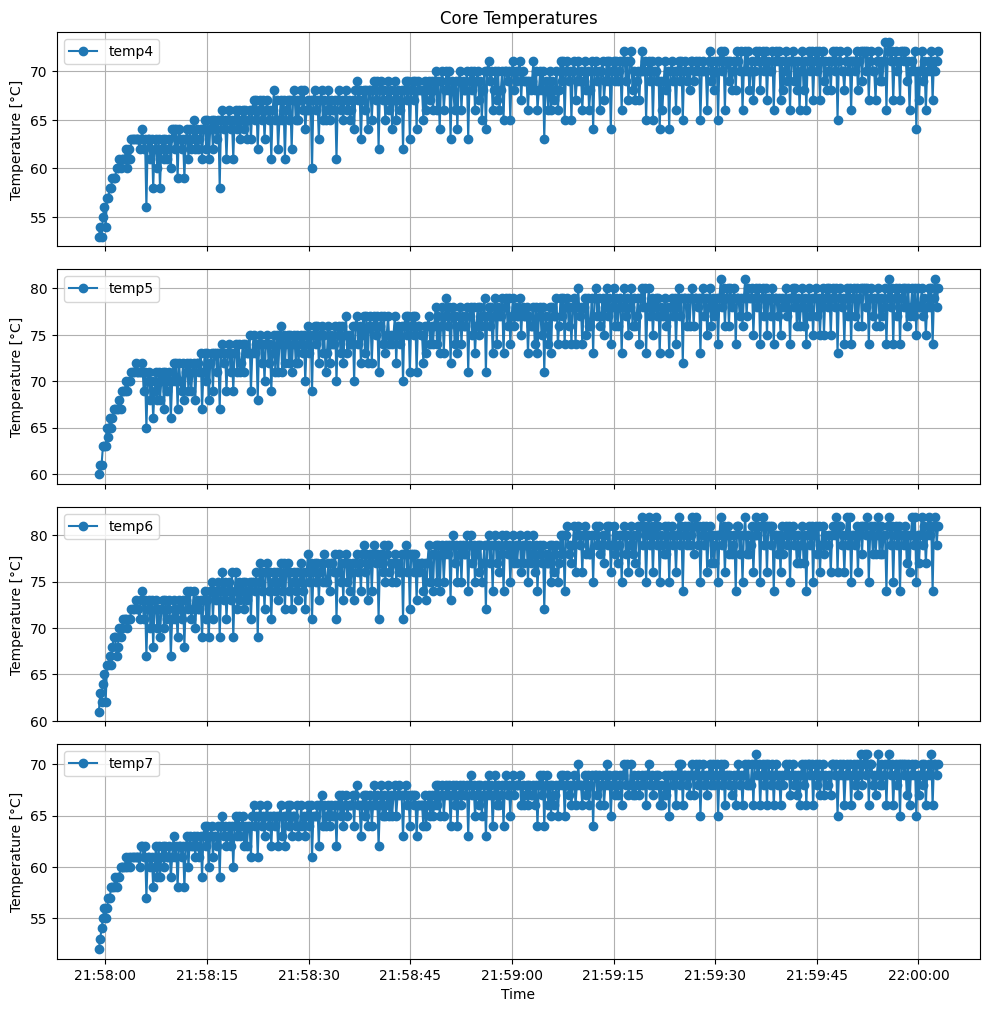

In [24]:
# Make a plot with subplots for each temperature
fig, axes = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(10, 10))

for i, temp in enumerate(['temp4', 'temp5', 'temp6', 'temp7']):
    axes[i].plot(df['time'], df[temp], 'o-', label=temp)
    axes[i].set_ylabel('Temperature [°C]')
    axes[i].legend()
    axes[i].grid()

axes[3].set_xlabel('Time')
fig.tight_layout()
axes[0].set_title('Core Temperatures')
fig.savefig

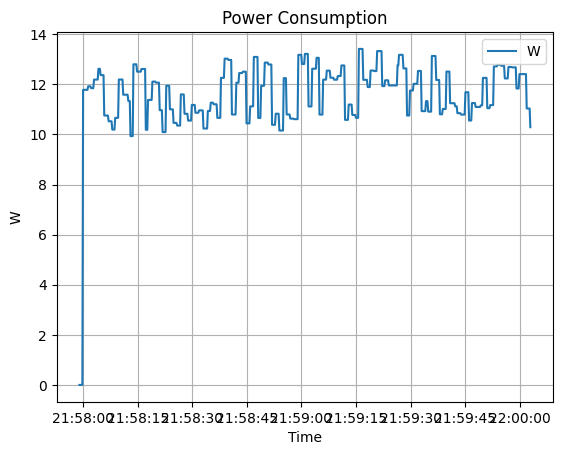

In [25]:
plt.plot(df['time'], df['W'], label='W')
plt.xlabel('Time')
plt.ylabel('W')
plt.title('Power Consumption')
plt.legend()
plt.grid()
plt.show()

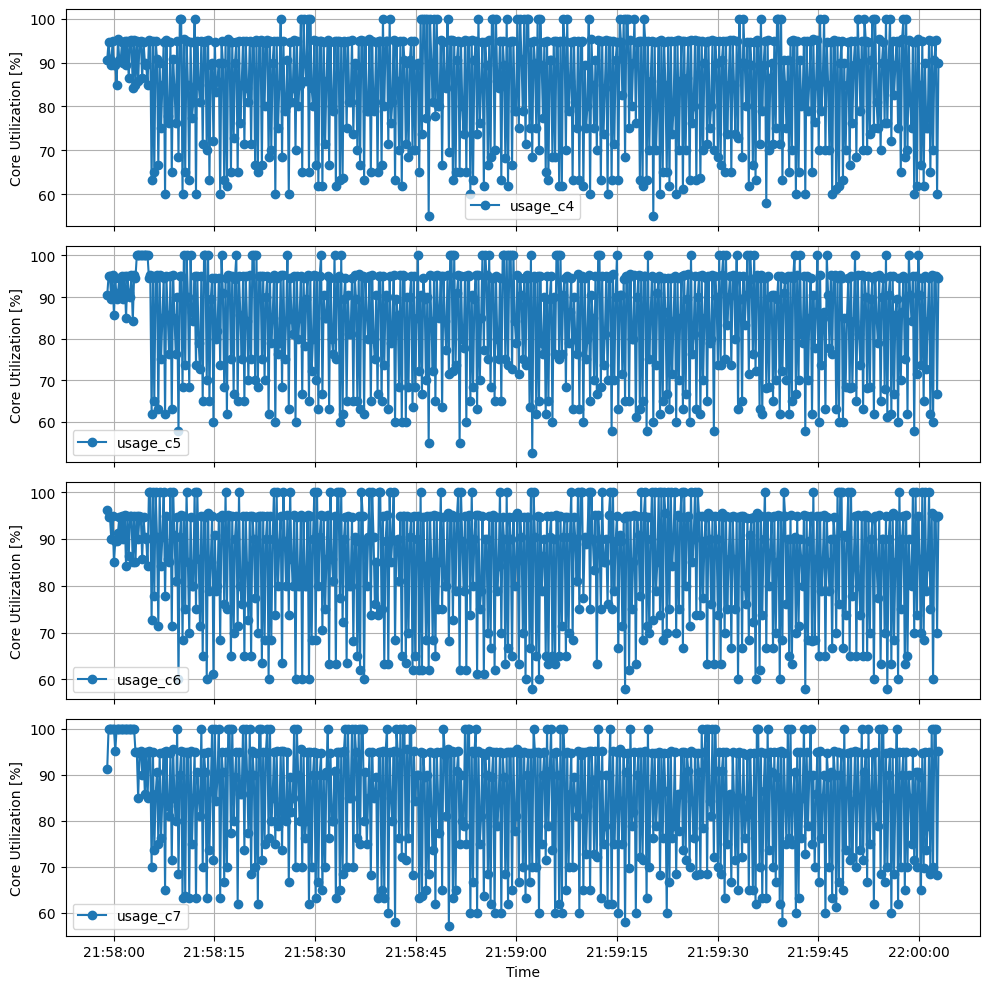

In [21]:
fig, axes = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(10, 10))

for i, usage in enumerate(['usage_c4', 'usage_c5', 'usage_c6', 'usage_c7']):
    axes[i].plot(df['time'], df[usage]*100, 'o-', label=usage)
    axes[i].set_ylabel('Core Utilization [%]')
    axes[i].legend()
    axes[i].grid()

axes[3].set_xlabel('Time')
axes[0].set_title('Core Utilization')
fig.tight_layout()

In [27]:
# Avergae power consumption
average_power = df['W'].mean()

# Make a new column containing the maximum value of the columns temp4, temp5, temp6, temp7 for each row
df['max_temp'] = df[['temp4', 'temp5', 'temp6', 'temp7']].max(axis=1)

# Mean max temperature
average_max_temp = df['max_temp'].mean()

# Max max temperature
max_max_temp = df['max_temp'].max()

print('Average power consumption: {:.2f} W'.format(average_power))
print('Average max temperature: {:.2f} °C'.format(average_max_temp))
print('Max max temperature: {:.2f} °C'.format(max_max_temp))

# Calculate the energy consumption in Joules as the sum of the power consumption in Watts multiplied by the sampling interval in seconds
#energy_consumption = (df['W'] * 10).sum() # Dont know the sampling interval yet

Average power consumption: 11.61 W
Average max temperature: 76.80 °C
Max max temperature: 82.00 °C
